<a href="https://colab.research.google.com/github/NoheliaEstefhania/FC_Lab_2023/blob/main/Lab009/EcNoLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
!jupyter nbconvert --to html /content/Lab009_EcNoLineales.ipynb

[NbConvertApp] Converting notebook /content/Lab009_EcNoLineales.ipynb to html
[NbConvertApp] Writing 6330161 bytes to /content/Lab009_EcNoLineales.html


In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Aplicando los métodos de resolución para ecuaciones no lineales resuelva las siguientes ecuaciones. La elección del método es libre.**


#### **Ejercicio 01: Método de la Secante**

$$y = ln(x − 2)$$

In [2]:
def graficaFuncion(a, b):
  x = np.linspace(a, b, 100) #inicia en 1, termina en b y 100 hace referencia al número de puntos en el rango
  #calculamos los valores correspondientes de y
  y = f(x)
  #gráfica de la función
  plt.plot(x, y)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('GRÁFICA DE LA FUNCIÓN')
  plt.grid(True) #para visualizar la cuadrícula
  plt.show() #para mostra la gráfica

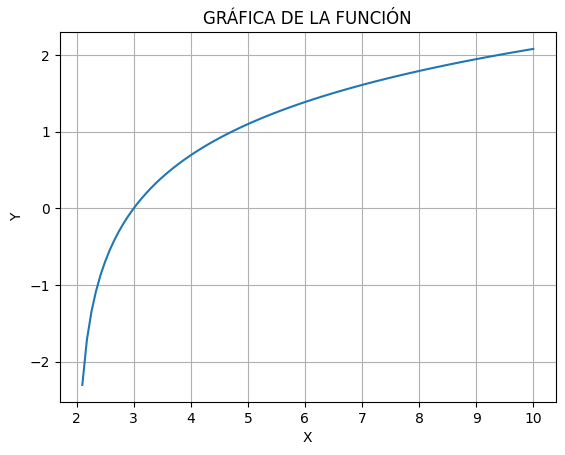

In [51]:
def f(x):
  return np.log(x-2)

graficaFuncion(2.1, 10)


A diferencia del método de Newton Raphson, para este método necesitaremos dos puntos inciales, $x_0$ y $x_1$ donde $x_i$ = $x_1$

$x_0$ y $x_1$ son elegidos arbitrariamente, para lo cual primero graficamos la función y de acuerdo a la gráfica elegimos los dos puntos.

Fórmula: $$x_{i + 1} = x_i - \frac{f(x_i) (x_i - x_{i-1})}{f(x_i) - f(x_{i - 1})}$$

Luego: $x_0 = x_1$  y  $x_1 = x_2$, hasta hallar la raiz más próxima con el error máximo establecido o hasta llegar al número máximo de iteraciones.

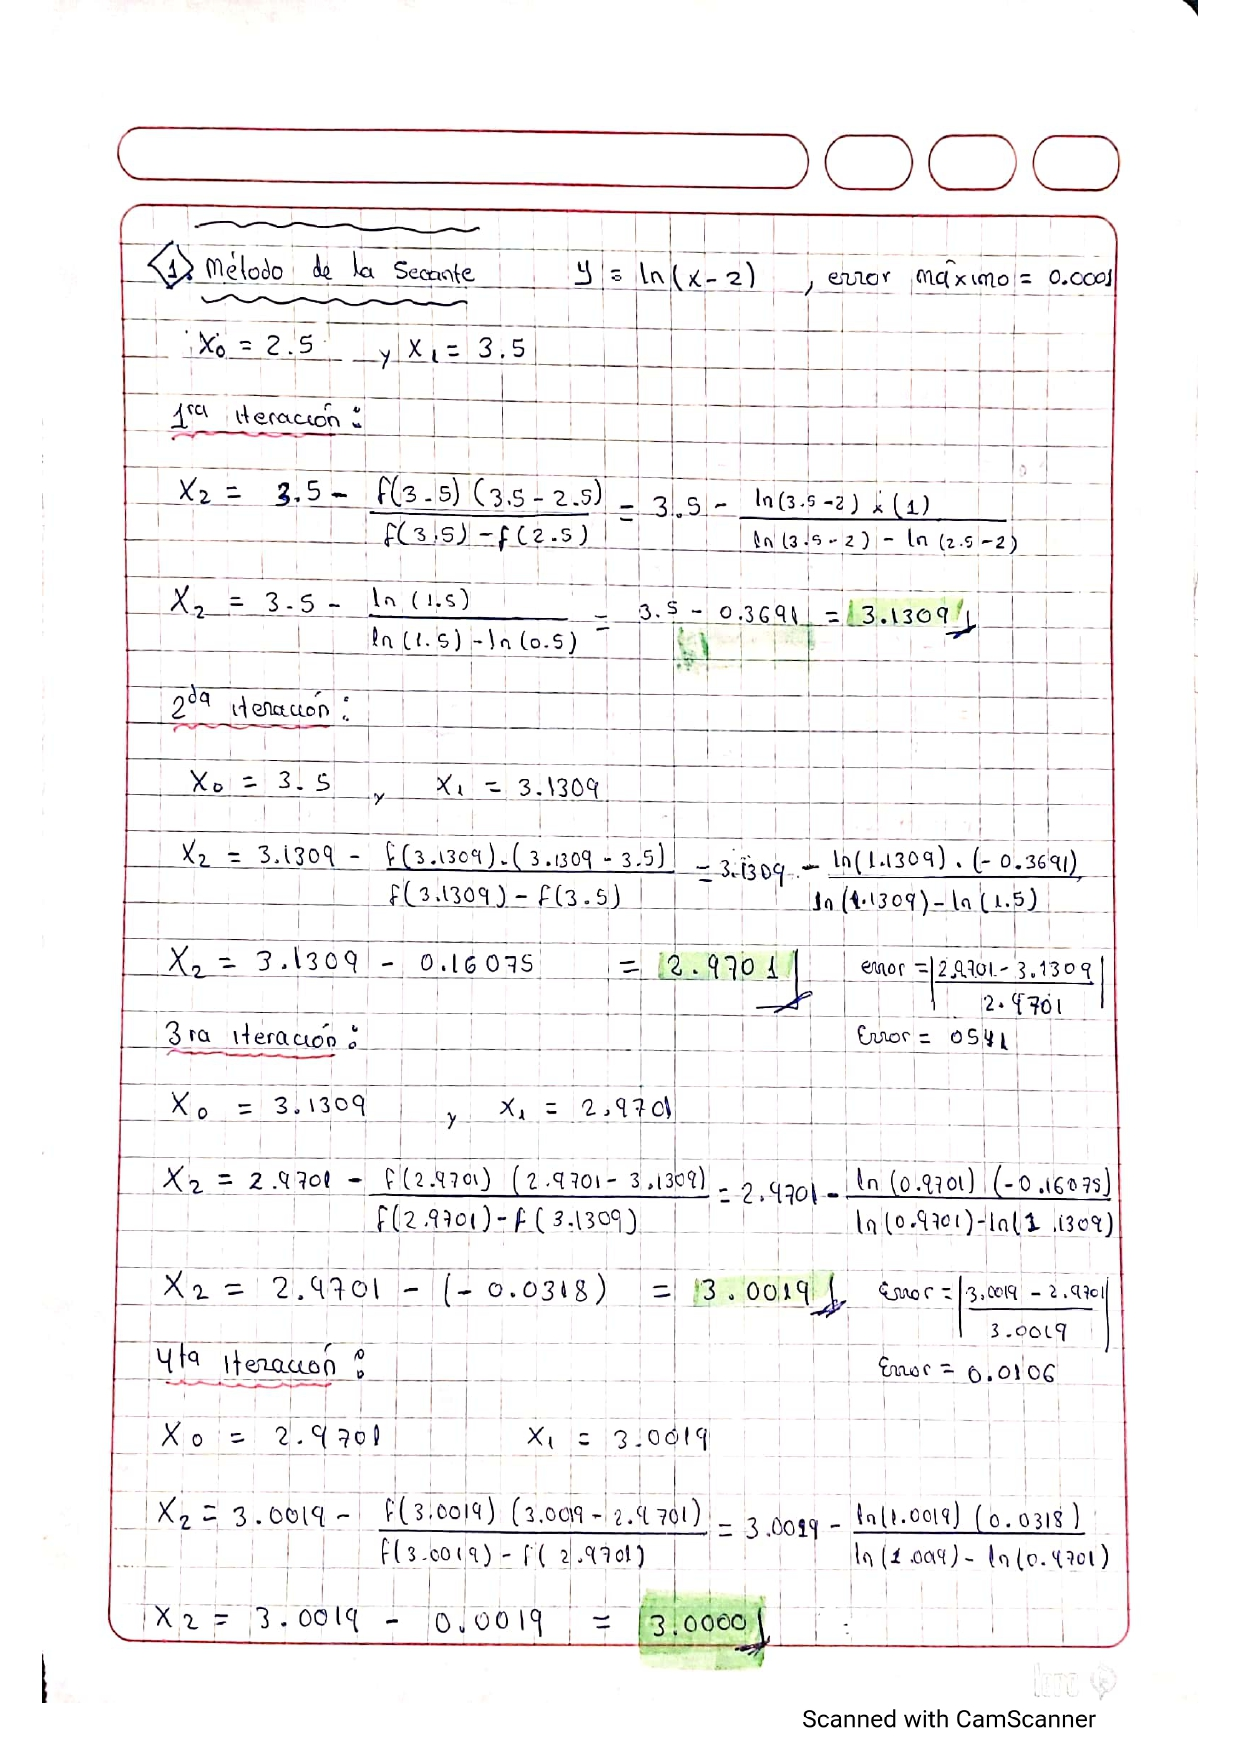

In [142]:
#cálculos manuales
from IPython.display import Image
Image('/content/drive/MyDrive/FC_Images/secante01.jpg')

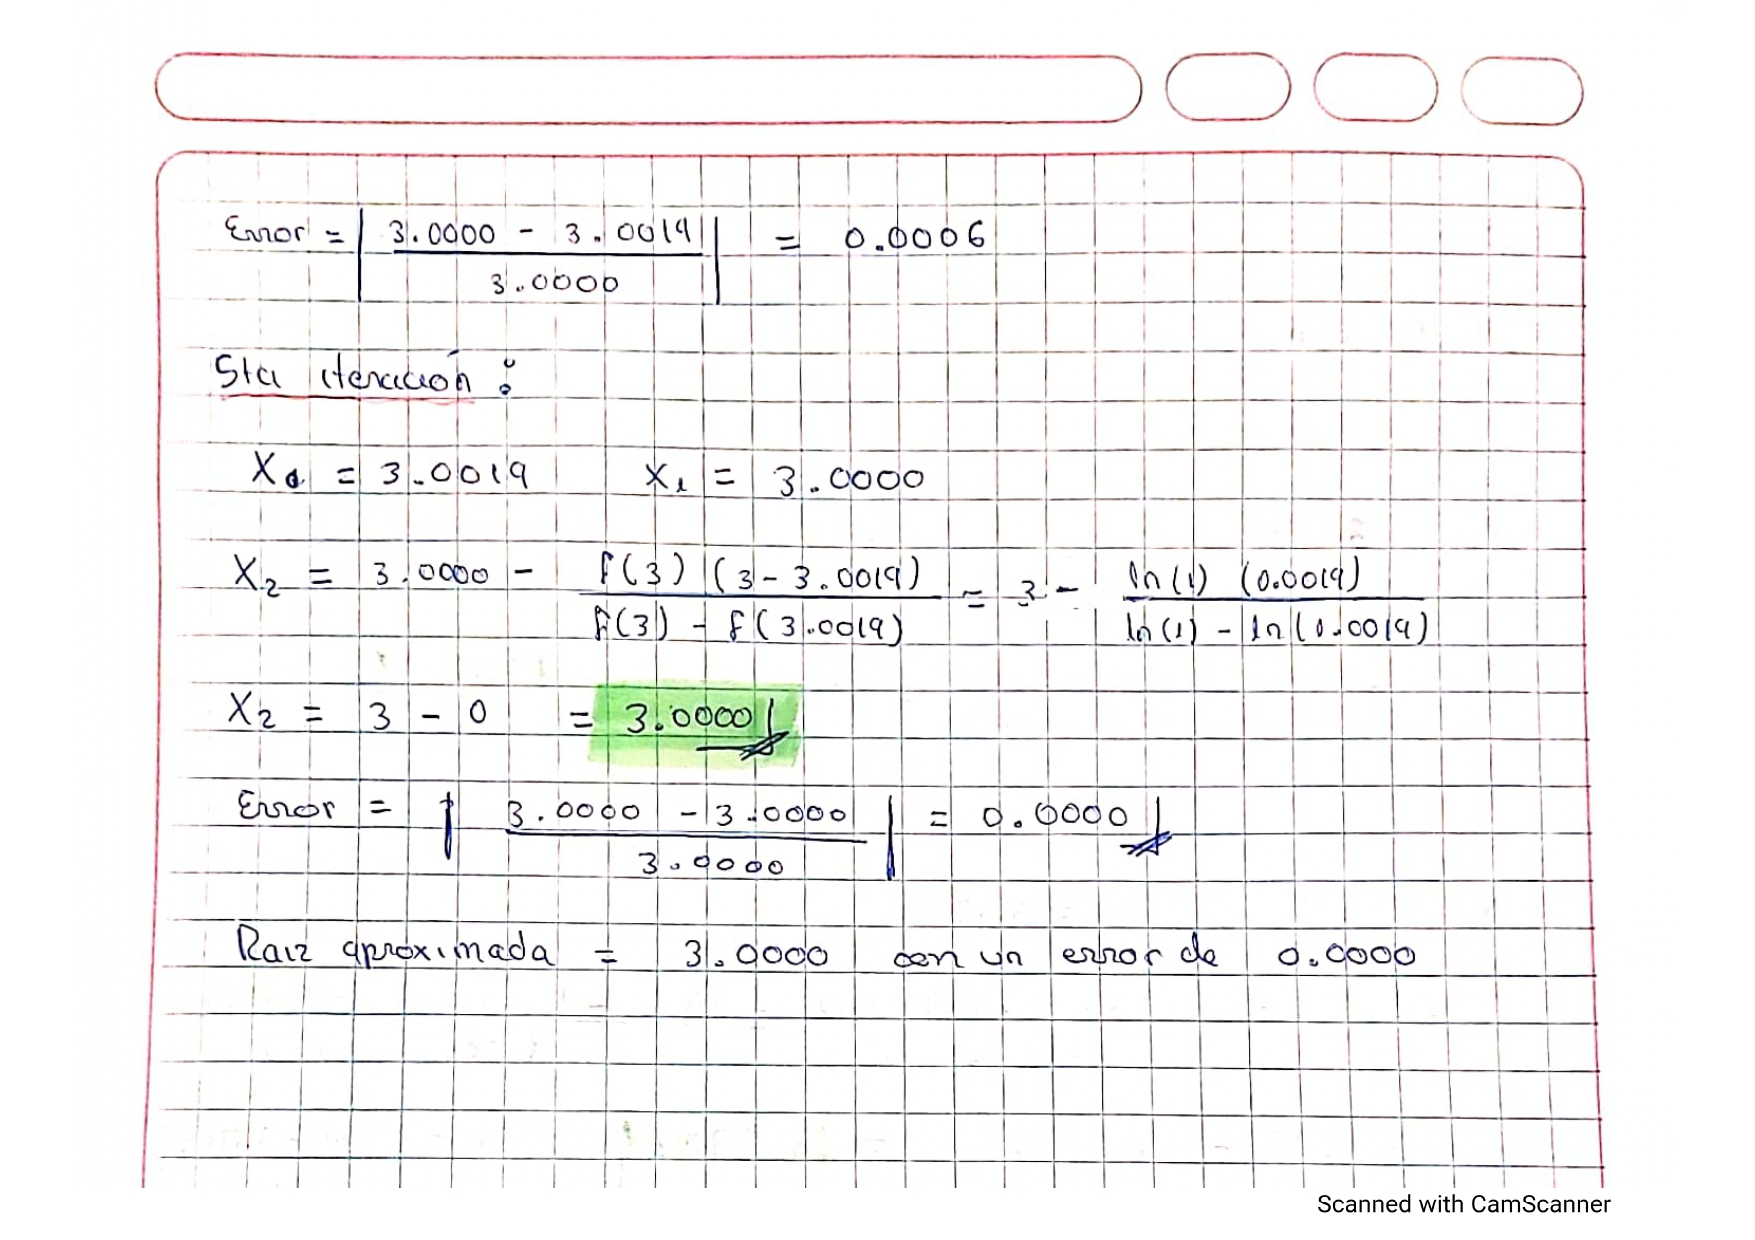

In [143]:
#cálculos manuales
from IPython.display import Image
Image('/content/drive/MyDrive/FC_Images/secante02.jpg')

In [43]:
#función que calcula la raíz de una función mediante el método de la secante
def secante(f, x0, x1, errorMax, n):
  i = 0
  error = abs((x1-x0)/x1)
  print("Iteración|   x0   |   x1   |   x2   |   Error")
  print("--------------------------------------------")
  while (error > errorMax and i < n):
    #hallamos el valor de x2 con la fórmula del método
    x2 = x1 - (f(x1) * (x1 - x0) / (f(x1) - f(x0)))
    #cálculo del error
    error = abs((x2-x1)/x2) # podríamos tomar a x1 también, ya que tomó el valor de x2
    i += 1
    #impresión de la tabla
    print(f'{i:9d} | {x0:.4f} | {x1:.4f} | {x2:.4f} | {error:.4f}')
    #asignación de nuevos valores
    x0 = x1
    x1 = x2
  if(error <= errorMax):
    print('\nRaiz aproximada =', f'{x2:.4f}', ' con un error de ', f'{error:.4f}')
  else:
    print('número máximo de iteraciones, no se encontró la raiz')

In [44]:
#secante(f, x0, x1, errorMax, n)
secante(f, 2.5, 3.5, 0.0001, 100)

Iteración|   x0   |   x1   |   x2   |   Error
--------------------------------------------
        1 | 2.5000 | 3.5000 | 3.1309 | 0.1179
        2 | 3.5000 | 3.1309 | 2.9701 | 0.0541
        3 | 3.1309 | 2.9701 | 3.0019 | 0.0106
        4 | 2.9701 | 3.0019 | 3.0000 | 0.0006
        5 | 3.0019 | 3.0000 | 3.0000 | 0.0000

Raiz aproximada = 3.0000  con un error de  0.0000


#### **Ejercicio 02. Método Newton Raphson**

$$y = e^{-x} $$

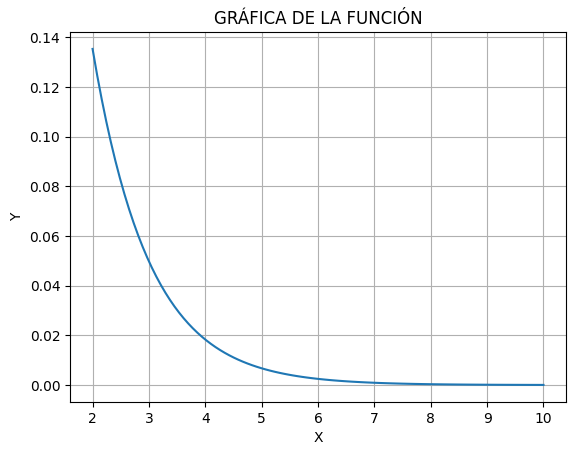

In [ ]:
def f(x):
  return np.exp(-x)
#Hallamos la derivada de la función
def df(x):
  return -np.exp(-x)

graficaFuncion(2, 10)

Este método se basa en la aproximación lineal de la función f(x) aplicando una tangente a la curva. La gráfica nos sirve para estimar el valor para $x_i$ . En este caso, podemos darnos cuenta de que la función no tiene raiz. Sin embargo probaremos nuestro algoritmo, la respuesta debería ser que no se encuentró la raiz en el número máximo de iteraciones.

Fórmula: $$x_{i + 1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

Luego: $x_0 = x_1$, hasta hallar la raiz más próxima con el error máximo establecido o hasta llegar al número máximo de iteraciones.

In [48]:
#función que calcula la raíz de una función mediante el método de Newton Raphson
def newtonRaphson(f, df, x0, errorMax, n):
  error = abs(x0)
  i=0
  print("Iteración |   x1    |   Error")
  print("-----------------------------")
  while (error > errorMax and i < n):
    x1 = x0 - (f(x0)/df(x0))
    #cálculo del error
    error = abs((x1-x0)/x1)
    x0 = x1
    i+=1
    #impresión de la tabla
    print(f'{i:9d} | {x0:.4f} | {error:.4f}')
  if(error <= errorMax):
    print('\nRaiz aproximada =', f'{x0:.4f}', ' con un error de ', f'{error:.5f}')
    print(i)
  else:
    print('número máximo de iteraciones, no se encontró la raiz')

In [ ]:
#newtonRaphson(f, df, x0, errorMax, n)
newtonRaphson(f, df, 2, 0.00001, 100)

Iteración |   x1    |   Error
-----------------------------
        1 | 3.0000 | 0.3333
        2 | 4.0000 | 0.2500
        3 | 5.0000 | 0.2000
        4 | 6.0000 | 0.1667
        5 | 7.0000 | 0.1429
        6 | 8.0000 | 0.1250
        7 | 9.0000 | 0.1111
        8 | 10.0000 | 0.1000
        9 | 11.0000 | 0.0909
       10 | 12.0000 | 0.0833
       11 | 13.0000 | 0.0769
       12 | 14.0000 | 0.0714
       13 | 15.0000 | 0.0667
       14 | 16.0000 | 0.0625
       15 | 17.0000 | 0.0588
       16 | 18.0000 | 0.0556
       17 | 19.0000 | 0.0526
       18 | 20.0000 | 0.0500
       19 | 21.0000 | 0.0476
       20 | 22.0000 | 0.0455
       21 | 23.0000 | 0.0435
       22 | 24.0000 | 0.0417
       23 | 25.0000 | 0.0400
       24 | 26.0000 | 0.0385
       25 | 27.0000 | 0.0370
       26 | 28.0000 | 0.0357
       27 | 29.0000 | 0.0345
       28 | 30.0000 | 0.0333
       29 | 31.0000 | 0.0323
       30 | 32.0000 | 0.0312
       31 | 33.0000 | 0.0303
       32 | 34.0000 | 0.0294
       33 | 35.0000

#### **Ejercicio 03. Método Newton Raphson**

$$y = e^x − x$$

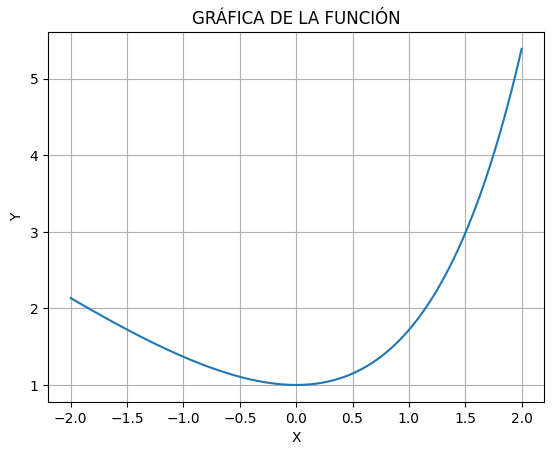

In [ ]:
def f(x):
  return (np.exp(x) - x)

#Hallamos la derivada de la función
def df(x):
  return np.exp(x) - 1

graficaFuncion(-2, 2)

En este caso, al igual que en el ejercicio anterior, incluso antes de utilizar algunos de 4 métodos aprendidos en clases, mediante el método gráfico se sabe que la función no converge, por lo tanto no tiene raiz.

In [ ]:
#newtonRaphson(f, df, x0, errorMax, n)
newtonRaphson(f, df, 1, 0.00001, 100)

Iteración |   x1    |   Error
-----------------------------
        1 | 2.0000 | 0.5000
        2 | 3.0000 | 0.3333
        3 | 4.0000 | 0.2500
        4 | 5.0000 | 0.2000
        5 | 6.0000 | 0.1667
        6 | 7.0000 | 0.1429
        7 | 8.0000 | 0.1250
        8 | 9.0000 | 0.1111
        9 | 10.0000 | 0.1000
       10 | 11.0000 | 0.0909
       11 | 12.0000 | 0.0833
       12 | 13.0000 | 0.0769
       13 | 14.0000 | 0.0714
       14 | 15.0000 | 0.0667
       15 | 16.0000 | 0.0625
       16 | 17.0000 | 0.0588
       17 | 18.0000 | 0.0556
       18 | 19.0000 | 0.0526
       19 | 20.0000 | 0.0500
       20 | 21.0000 | 0.0476
       21 | 22.0000 | 0.0455
       22 | 23.0000 | 0.0435
       23 | 24.0000 | 0.0417
       24 | 25.0000 | 0.0400
       25 | 26.0000 | 0.0385
       26 | 27.0000 | 0.0370
       27 | 28.0000 | 0.0357
       28 | 29.0000 | 0.0345
       29 | 30.0000 | 0.0333
       30 | 31.0000 | 0.0323
       31 | 32.0000 | 0.0312
       32 | 33.0000 | 0.0303
       33 | 34.0000 

#### **Ejercicio 04. Método de la Secante y método Biseccion**

$$10e^{x/2} cos(2x)$$


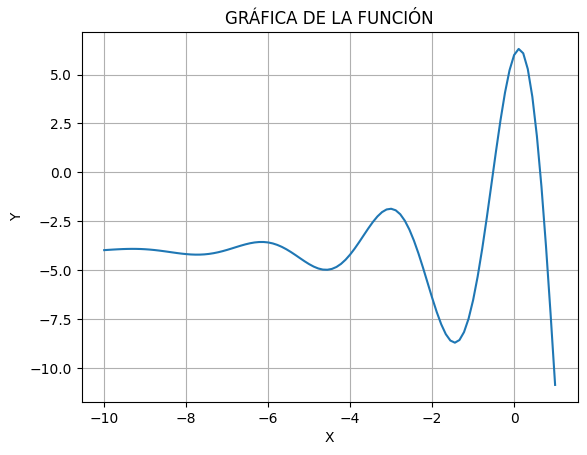

In [3]:
def f(x):
  return (10 * np.exp(x/2) * np.cos(2*x) - 4)

graficaFuncion(-10, 1)

Utilizamos primero el método de la secante para hallar la raiz



In [59]:
#secante(f, x0, x1, errorMax, n)
secante(f, 0.1, 3.5, 0.0001, 100)

Iteración|   x0   |   x1   |   x2   |   Error
--------------------------------------------
        1 | 0.1000 | 3.5000 | -0.5478 | 7.3889
        2 | 3.5000 | -0.5478 | -0.4949 | 0.1069
        3 | -0.5478 | -0.4949 | -0.5136 | 0.0364
        4 | -0.4949 | -0.5136 | -0.5137 | 0.0001

Raiz aproximada = -0.5137  con un error de  0.0001


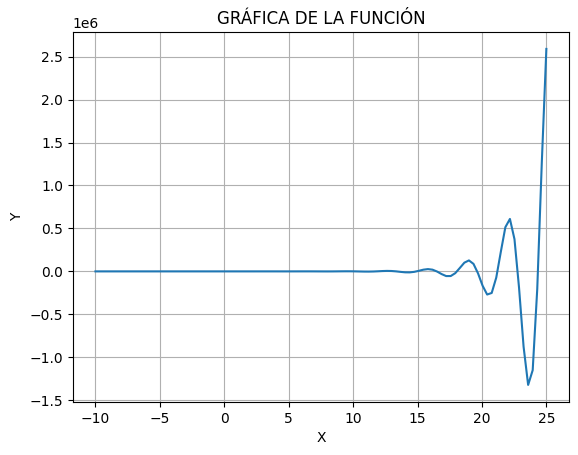

In [62]:
def f(x):
  return (10 * np.exp(x/2) * np.cos(2*x) - 4)

graficaFuncion(-10, 25)

Sin embargo, podemos notar que la función tiene más de una raiz. Para hallar varias raíces aplicaremos el método de bisección.

In [69]:
'''
a: menor valor del intervalo
b: mayor valor del intervalo
n: Número de iteraciones
'''
def biseccionMul(f, a, b, errorMax, n):
  r = (a + b) / 2
  error = abs(b - a)
  i = 1
  print("\nIteración|   a   |   r   |   b   |   Error")
  print("--------------------------------------------")
  while error > errorMax and i < n:
    #impresión de la tabla
    print(f'{i:9d}| {a:.4f}| {r:.4f}| {b:.4f} | {error:.4f}')
    i+=1
    #cálculo de la raiz
    if f(a)*f(r) < 0: #derecha
      b = r
    elif f(b)*f(r) < 0: #izquierda
      a = r
    else: # f(r) == 0 es la raiz dada y se termina el cálculo
      break
    #cálculo del error
    x = r #x_anterior
    r = (a + b) / 2 #x_nuevo
    error = abs((r - x)/r)
  if(error <= errorMax):
    return r
  else:
    return None

#datos
a = -10
b = 10
errorMax = 0.0001
n = 100

#número de raíces a encontrar
nRaices = 3
raicesEncontradas = []

#bucle para encontrar múltiples raíces
for i in range(nRaices):
  print('------------------------------------------------')
  print('\n --> Calculando la raiz', (i+1))
  raiz = biseccionMul(f, a, b, errorMax, n)
  if raiz is not None:
    print('\nLa raiz próxima ',(i+1), ' es ', f'{raiz:.4f}')
    raicesEncontradas.append(raiz)
    #actualizamos los intervalos para buscar la próxima raíz
    a = raiz + 0.1
    b = b + 10.0

#imprimir las raíces encontradas
print("\nRaíces encontradas:")
print('----------------------')
for raiz in raicesEncontradas:
    print('-> ',f'{raiz:.4f}')

------------------------------------------------

 --> Calculando la raiz 1

Iteración|   a   |   r   |   b   |   Error
--------------------------------------------
        1| -10.0000| 0.0000| 10.0000 | 20.0000
        2| -10.0000| -5.0000| 0.0000 | 1.0000
        3| -5.0000| -2.5000| 0.0000 | 1.0000
        4| -2.5000| -1.2500| 0.0000 | 1.0000
        5| -1.2500| -0.6250| 0.0000 | 1.0000
        6| -0.6250| -0.3125| 0.0000 | 1.0000
        7| -0.6250| -0.4688| -0.3125 | 0.3333
        8| -0.6250| -0.5469| -0.4688 | 0.1429
        9| -0.5469| -0.5078| -0.4688 | 0.0769
       10| -0.5469| -0.5273| -0.5078 | 0.0370
       11| -0.5273| -0.5176| -0.5078 | 0.0189
       12| -0.5176| -0.5127| -0.5078 | 0.0095
       13| -0.5176| -0.5151| -0.5127 | 0.0047
       14| -0.5151| -0.5139| -0.5127 | 0.0024
       15| -0.5139| -0.5133| -0.5127 | 0.0012
       16| -0.5139| -0.5136| -0.5133 | 0.0006
       17| -0.5139| -0.5138| -0.5136 | 0.0003
       18| -0.5138| -0.5137| -0.5136 | 0.0001

La raiz p

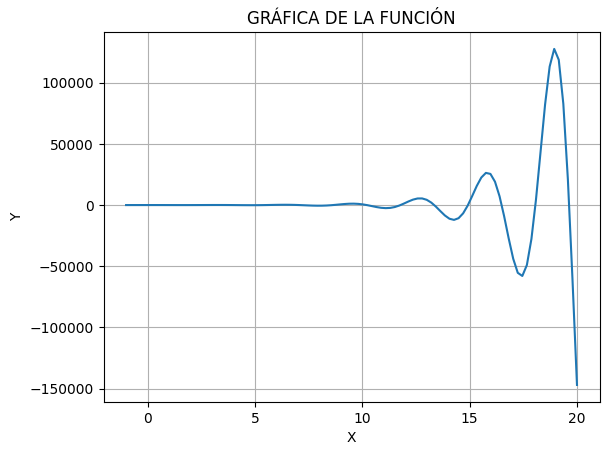

In [61]:
def f(x):
  return (10 * np.exp(x/2) * np.cos(2*x) - 4)

graficaFuncion(-1, 20)

#### **Ejercicio 05. Método Bisección**

$$y = x^2 − 2$$

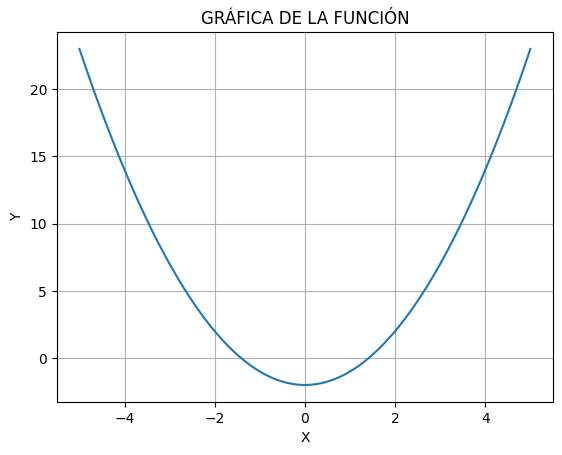

In [71]:
def f(x):
  return ((x**2) - 2)

graficaFuncion(-5, 5)

Tenemos que ir acercando los extremos del intervalo dado a y b, hasta obtener un intervalo de anchura suficientemente pequeño en el que encuentra un cero.
Primero evaluamos : $f(a) * f(b) < 0$ ?
Luego: $r = \frac{a + b}{2}$

Finalmente:

si $f(a)f(r) < 0 => b = r$

si $f(b)f(r) < 0 => a = r$

El cálculo se termina cuando si $f(r) = 0$, o cuando se llega al número máximo de iteraciones.

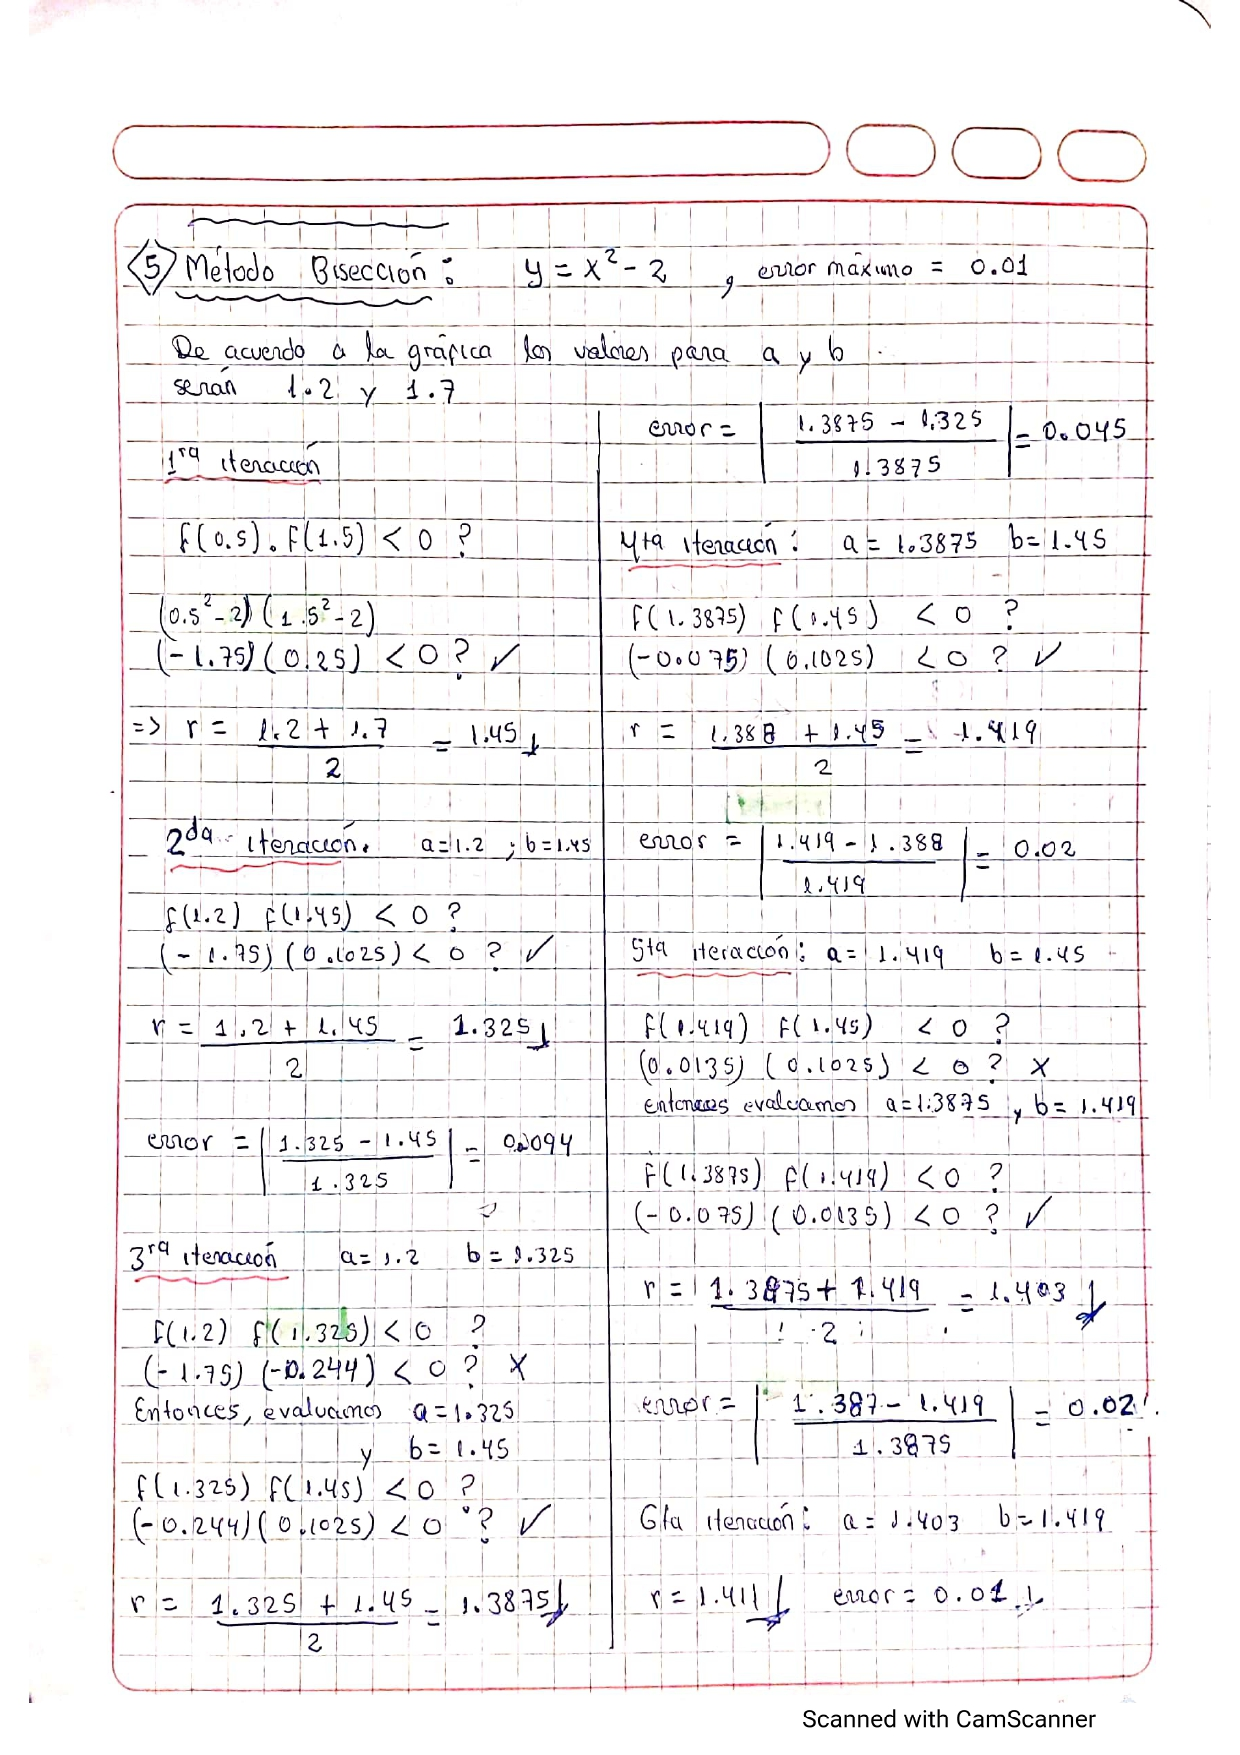

In [145]:
#cálculos manuales
from IPython.display import Image
Image('/content/drive/MyDrive/FC_Images/biseccion.jpg')

In [96]:
'''
a: menor valor del intervalo
b: mayor valor del intervalo
n: Número de iteraciones
'''
def biseccion(f, a, b, errorMax, n):
  r = (a + b) / 2
  error = abs(b - a)
  i = 1
  print("Iteración|   a  |   r  |   b   |  Error")
  print("--------------------------------------------")
  while error > errorMax and i < n:
    #impresión de la tabla
    print(f'{i:9d}| {a:.3f}| {r:.3f}| {b:.3f} | {error:.3f}')
    i+=1
    #cálculo de la raiz
    if f(a)*f(r) < 0: #derecha
      b = r
    elif f(b)*f(r) < 0: #izquierda
      a = r
    else: # f(r) == 0 es la raiz dada y se termina el cálculo
      break
    r_ant = r
    r = (a + b) / 2
    #cálculo del error
    error = abs((r - r_ant)/r)
  if(error <= errorMax):
    print(f'{i:9d}| {a:.3f}| {r:.3f}| {b:.3f} | {error:.3f}')
    print('\nRaiz aproximada =', f'{r:.2f}',' con un error de ', f'{error:.3f}')
  else:
    print('número máximo de iteraciones, no se encontró la raiz')

In [97]:
#biseccion(a, b, funcion, errorMax, n)
biseccion(f, 1.2, 1.7, 0.01, 100)

Iteración|   a  |   r  |   b   |  Error
--------------------------------------------
        1| 1.200| 1.450| 1.700 | 0.500
        2| 1.200| 1.325| 1.450 | 0.094
        3| 1.325| 1.387| 1.450 | 0.045
        4| 1.387| 1.419| 1.450 | 0.022
        5| 1.387| 1.403| 1.419 | 0.011
        6| 1.403| 1.411| 1.419 | 0.006

Raiz aproximada = 1.41  con un error de  0.006


##### **Ejercicio 06. Método Falsa Posición**

$$y = x^3 − 2$$

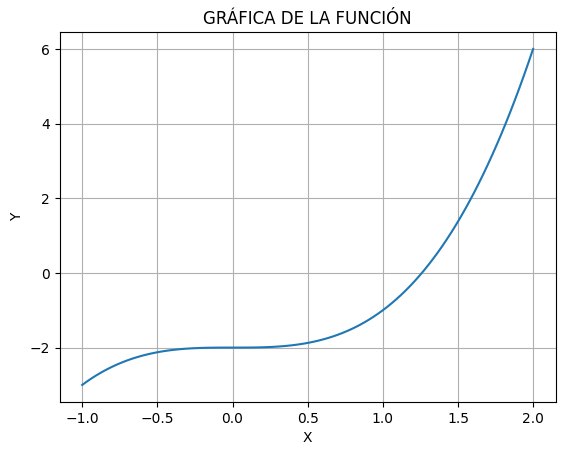

In [98]:
def f(x):
  return (x**3 - 2)

graficaFuncion(-1, 2)

Fórmula: $$r = b - \frac{f(b)*(b-a)}{f(b) - f(a)}$$

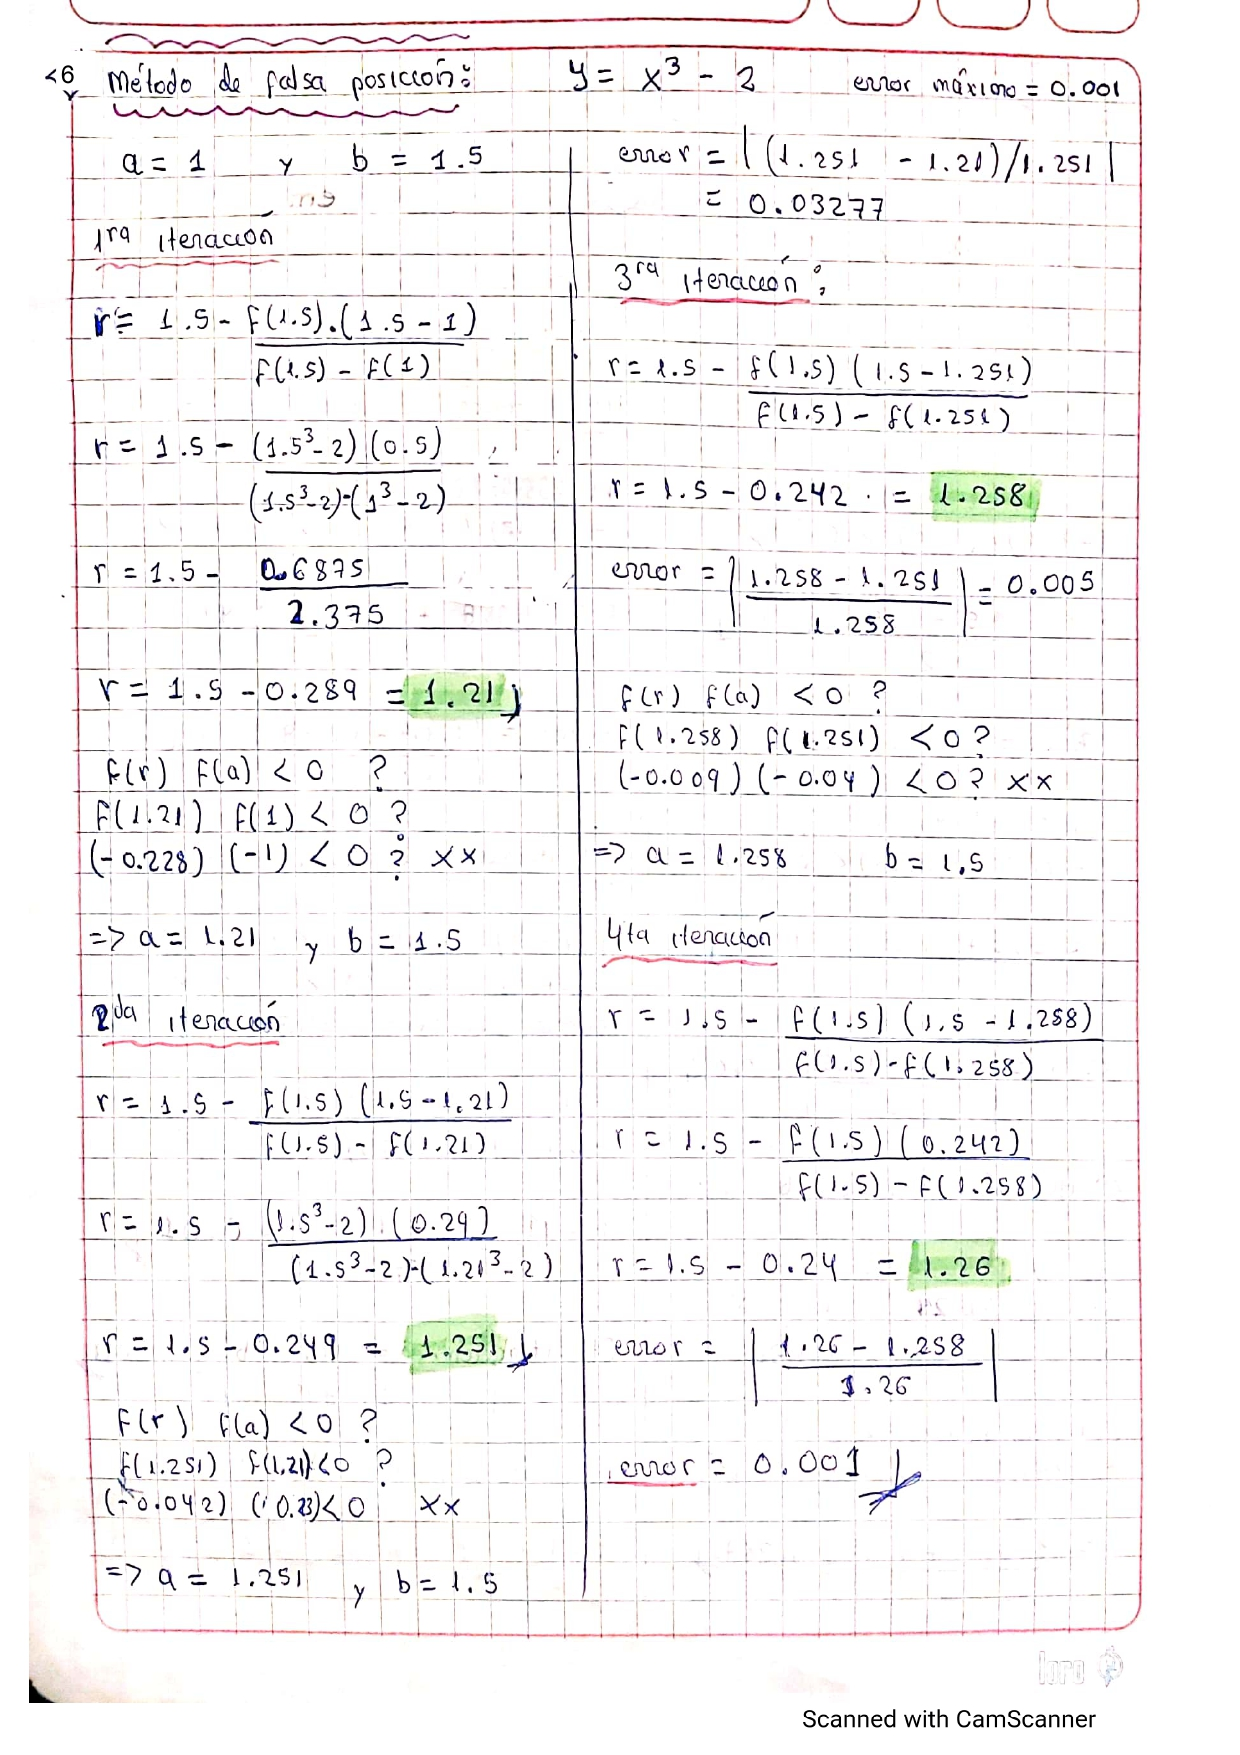

In [144]:
#cálculos manuales
from IPython.display import Image
Image('/content/drive/MyDrive/FC_Images/falsaPosicion.jpg')

In [134]:
def falsaPosicion(f, a, b, errorMax, n):
  r = b - ((f(b) * (b - a))/(f(b) - f(a)))
  i = 1
  error = abs(a - b)
  print('Iteración |   a   |   r   |   b   | Error')
  print('--------------------------------------------')
  while error > errorMax and i < n:
    #impresión de la tabla
    print(f'{i:9d} | {a:.3f} | {r:.3f} | {b:.3f} | {error:.4f}')
    #las condiciones
    if f(r) * f(a) < 0: # negativo
      b = r
    else: # positivo
      a = r
    #cálculo de r
    r_ant = r
    r = b - ((f(b) * (b - a)) /(f(b) - f(a)))
    #cálculo del error
    error = abs(r - r_ant)/r
    i+=1
  if(error <= errorMax):
    print(f'{i:9d} | {a:.3f} | {r:.3f} | {b:.3f} | {error:.4f}')
    print('\nRaiz aproximada =', round(r, 3), ' con un error de ', f'{error:.4f}')
    #print('total iteraciones = ', i)
  else:
    print('No se encontró una solución en el número máximo de iteraciones')

In [135]:
#falsaPosicion(f, a, b, errorMax, n)
falsaPosicion(f, 1, 1.5, 0.001, 100)

Iteración |   a   |   r   |   b   | Error
--------------------------------------------
        1 | 1.000 | 1.211 | 1.500 | 0.5000
        2 | 1.211 | 1.251 | 1.500 | 0.0327
        3 | 1.251 | 1.258 | 1.500 | 0.0056
        4 | 1.258 | 1.260 | 1.500 | 0.0010

Raiz aproximada = 1.26  con un error de  0.0010


#### **Ejercicio 07. Método Bisección**

$$xcosy + ysenx − 2$$

In [13]:
def graficaFuncion3d(a, b):
  x = np.linspace(a, b, 100) #inicia en 1, termina en b y 100 hace referencia al número de puntos en el rango
  y = np.linspace(a, b, 100) #inicia en 1, termina en b y 100 hace referencia al número de puntos en el rango
  x, y = np.meshgrid(x, y)
  #calculamos los valores correspondientes de y
  z = f(x, y)
  #gráfica de la función
  plt.contourf(x, y, z, levels=20, cmap='viridis')
  #plt.colorbar()
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('GRÁFICA DE LA FUNCIÓN')
  plt.grid(True) #para visualizar la cuadrícula
  plt.show() #para mostra la gráfica

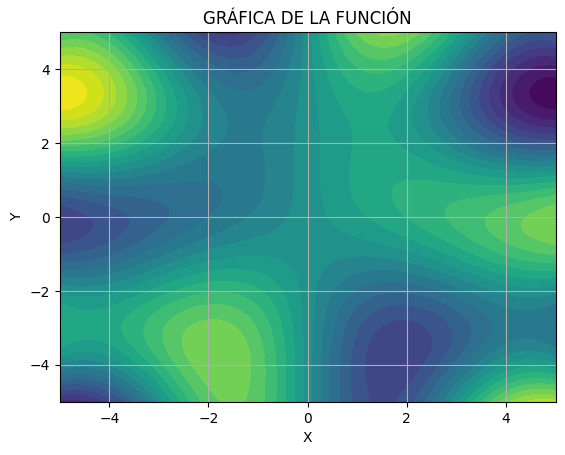

In [14]:
def f(x, y):
  return x * np.cos(y) + y * np.sin(x) - 2

graficaFuncion3d(-5, 5)

In [45]:
'''
a: menor valor del intervalo
b: mayor valor del intervalo
n: Número de iteraciones
'''
def biseccionXY(a, b, funcion, errorMax, n):
  r = (a + b) / 2
  error = abs(b - a)
  i = 0
  print("Iteración|   a   |   r   |   b   |   Error")
  print("--------------------------------------------")
  while error > errorMax and i < n:
    #cálculo de la raiz
    if f(a, 0)*f(r, 0) < 0: #derecha
      b = r
    elif f(b, 0)*f(r, 0) < 0: #izquierda
      a = r
    else: # f(r) == 0 es la raiz dada y se termina el cálculo
      break
    #cálculo del error
    x = r #x_anterior
    r = (a + b) / 2 #x_nuevo
    error = abs((r - x)/r)
    #mostrando resultado
    i+=1
    #print(i, x, f(x), '{:%}'.format(error))
    #impresión de la tabla
    print(f'{i:9d}| {a:.4f}| {r:.4f}| {b:.4f} | {error:.4f}')
  if(error <= errorMax):
    print('\nRaiz aproximada =', f'{r:.4f}',' con un error de ', f'{error:.4f}')
  else:
    print('número máximo de iteraciones, no se encontró la raiz')

In [18]:
#biseccion(a, b, funcion, errorMax, n)
biseccionXY(-10, 10, f, 0.0001, 100)


Iteración|   a   |   r   |   b   |   Error
--------------------------------------------
        1| 0.0000| 5.0000| 10.0000 | 1.0000
        2| 0.0000| 2.5000| 5.0000 | 1.0000
        3| 0.0000| 1.2500| 2.5000 | 1.0000
        4| 1.2500| 1.8750| 2.5000 | 0.3333
        5| 1.8750| 2.1875| 2.5000 | 0.1429
        6| 1.8750| 2.0312| 2.1875 | 0.0769
        7| 1.8750| 1.9531| 2.0312 | 0.0400
        8| 1.9531| 1.9922| 2.0312 | 0.0196
        9| 1.9922| 2.0117| 2.0312 | 0.0097
       10| 1.9922| 2.0020| 2.0117 | 0.0049
       11| 1.9922| 1.9971| 2.0020 | 0.0024
       12| 1.9971| 1.9995| 2.0020 | 0.0012
       13| 1.9995| 2.0007| 2.0020 | 0.0006
       14| 1.9995| 2.0001| 2.0007 | 0.0003
       15| 1.9995| 1.9998| 2.0001 | 0.0002
       16| 1.9998| 2.0000| 2.0001 | 0.0001

Raiz aproximada = 2.0000  con un error de  0.0001


#### **Ejercicio 08. Método Falsa Posición**

$$x^3 + 4x^2 − 10$$

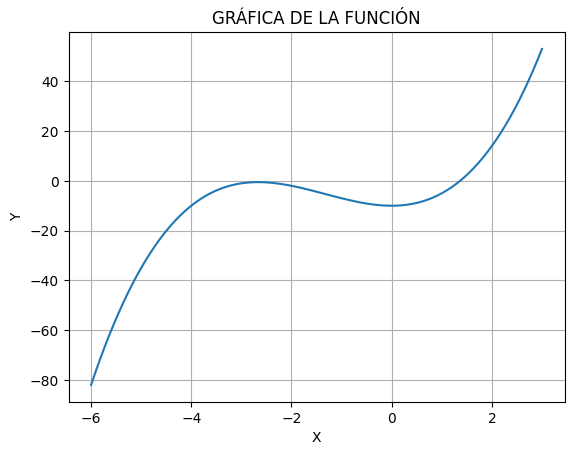

In [9]:
def f(x):
  return (x**3) + (4 * x**2) - 10

graficaFuncion(-6, 3)

In [11]:
#falsaPosicion(f, a, b, errorMax, n)
falsaPosicion(f, 0.8, 1.8, 0.0001, 100)

Iteración |   a    |   r    |   b    |   Error
--------------------------------------------
        1 | 1.2407 | 1.2407 | 1.8000 | 1.9326
        2 | 1.3415 | 1.3415 | 1.8000 | 0.3873
        3 | 1.3608 | 1.3608 | 1.8000 | 0.0722
        4 | 1.3644 | 1.3644 | 1.8000 | 0.0133
        5 | 1.3651 | 1.3651 | 1.8000 | 0.0024
        6 | 1.3652 | 1.3652 | 1.8000 | 0.0004
        7 | 1.3652 | 1.3652 | 1.8000 | 0.0001

Raiz aproximada =1.3652  con un error de  0.0001
